## Clustering Visualisation

In [1]:
import numpy as np
import pandas as pd

data = np.load('100New_LDAdistr.npy')
print(np.shape(data))
print(type(data))

import os
with open('list_of_species.txt', encoding='utf-8', errors='ignore') as f:
    Names = f.readlines()
Names = [x.strip() for x in Names]
Names_100New = []
for document in os.listdir( "BoW_100random/" ):
    temp = Names[ int(document[:-8])-1 ]
    #print( temp )
    Names_100New.append( temp )


(100, 10)
<class 'numpy.ndarray'>


In [2]:
#species = ['bird1', 'bird2', 'bird3', 'bird4', 'bird5', 'bird6']
species = Names_100New

articles = np.array([['abdim', 'stork', 'ciconia', 'abdimii', 'also', 'known', 'white', 'bellied', 'stork', 'black', 'stork', 'grey', 'leg', 'red', 'knee', 'foot', 'grey', 'bill', 'white', 'underpart', 'red', 'facial', 'skin', 'front', 'eye', 'blue', 'skin', 'near', 'bill', 'breeding', 'season', 'smallest', 'specie', 'stork', 'weight', 'lb', 'female', 'lay', 'two', 'three', 'egg', 'slightly', 'smaller', 'male', 'abdim', 'stork', 'distributed', 'open', 'habitat', 'throughout', 'eastern', 'africa', 'ethiopia', 'south', 'south', 'africa', 'diet', 'consists', 'mainly', 'locust', 'caterpillar', 'large', 'insect', 'although', 'bird', 'also', 'eat', 'small', 'reptile', 'amphibian', 'mouse', 'crab', 'egg', 'among', 'smallest', 'stork', 'specie', 'welcomed', 'protected', 'local', 'african', 'belief', 'harbinger', 'rain', 'good', 'luck', 'name', 'commemorates', 'turkish', 'governor', 'wadi', 'halfa', 'sudan', 'bey', 'arnaut', 'abdim', 'widespread', 'common', 'throughout', 'large', 'range', 'abdim', 'stork', 'evaluated', 'least', 'concern', 'iucn', 'red', 'list', 'threatened', 'specie', 'subject', 'several', 'nationally', 'coordinated', 'breeding', 'program', 'united', 'state', 'plan', 'specie', 'administered', 'association', 'zoo', 'aquarium', 'europe', 'european', 'association', 'zoo', 'aquarium', 'san', 'diego', 'zoo', 'egg', 'ciconia', 'abdimii', 'muséum', 'toulouse', 'africa', 'distribution', 'abdim', 'stork'], #each row represents an individual document
                     ['abd', 'kuri', 'sparrow', 'passer', 'hemileucus', 'passerine', 'bird', 'endemic', 'small', 'island', 'abd', 'kuri', 'also', 'spelled', 'several', 'way', 'socotra', 'archiplago', 'indian', 'ocean', 'horn', 'africa', 'though', 'specie', 'originally', 'described', 'distinct', 'specie', 'considered', 'conspecific', 'socotra', 'sparrow', 'study', 'guy', 'kirwan', 'showed', 'significant', 'difference', 'socotra', 'sparrow', 'two', 'sparrow', 'might', 'even', 'different', 'origin', 'evidence', 'morphologically', 'distinct', 'birdlife', 'international', 'hence', 'iucn', 'red', 'list', 'recognised', 'specie', 'listed', 'ioc', 'world', 'bird', 'list', 'december', 'restricted', 'distribution', 'population', 'individual', 'despite', 'known', 'threat', 'considered', 'vulnerable', 'specie', 'iucn', 'red', 'list'],
                     ['nectarinia', 'sovimanga', 'souimanga', 'sunbird', 'cinnyris', 'sovimanga', 'small', 'passerine', 'bird', 'sunbird', 'family', 'nectariniidae', 'native', 'island', 'western', 'indian', 'ocean', 'occurs', 'madagascar', 'aldabra', 'group', 'glorioso', 'island', 'souimanga', 'sunbird', 'long', 'wingspan', 'black', 'bill', 'long', 'thin', 'curved', 'male', 'nominate', 'subspecies', 'metallic', 'green', 'head', 'back', 'throat', 'breast', 'blackish', 'le', 'continuous', 'red', 'band', 'belly', 'yellow', 'wing', 'tail', 'brown', 'yellow', 'tuft', 'side', 'breast', 'become', 'visible', 'bird', 'lift', 'wing', 'courtship', 'display', 'male', 'presumably', 'moult', 'duller', 'eclipse', 'plumage', 'march', 'april', 'losing', 'metallic', 'red', 'feathering', 'month', 'female', 'grey', 'brown', 'upperparts', 'dull', 'yellow', 'belly', 'grey', 'throat', 'breast', 'darker', 'marking', 'juvenile', 'similar', 'adult', 'female', 'chin', 'throat', 'sometimes', 'black', 'upperparts', 'may', 'olive', 'abbott', 'sunbirds', 'see', 'larger', 'long', 'wingspan', 'male', 'broader', 'red', 'breastband', 'yellow', 'underpart', 'dark', 'brown', 'ssp', 'abbotti', 'blackish', 'ssp', 'buchenorum', 'male', 'bird', 'nominate', 'group', 'wing', 'tail', 'long', 'bill', 'female', 'measure', 'le', 'bird', 'chirruping', 'flight', 'call', 'loud', 'hoarse', 'alarm', 'call', 'male', 'sings', 'fast', 'scratchy', 'song', 'frequently', 'repeated', 'phrase', 'five', 'subspecies', 'nominate', 'subspecies', 'sovimanga', 'found', 'across', 'madagascar', 'glorioso', 'island', 'south', 'western', 'madagascar', 'replaced', 'apolis', 'aldabrensis', 'aldabra', 'atoll', 'abbotti', 'assumption', 'island', 'buchenorum', 'cosmoledo', 'astove', 'form', 'abbotti', 'buchenorum', 'sometimes', 'considered', 'separate', 'specie', 'abbott', 'sunbird', 'would', 'called', 'cinnyris', 'abbotti', 'citation', 'needed', 'sunbird', 'one', 'separated', 'former', 'catch', 'genus', 'nectarinia', 'cinnyris', 'citation', 'needed', 'together', 'malagasy', 'white', 'eye', 'madagascan', 'cisticola', 'souimanga', 'sunbirds', 'common', 'small', 'landbirds', 'across', 'much', 'range', 'ample', 'stock', 'present', 'specie', 'white', 'eye', 'exist', 'maybe', 'square', 'habitat', 'glorioso', 'island', 'iucn', 'considers', 'specie', 'least', 'concern', 'souimanga', 'sunbird', 'found', 'variety', 'habitat', 'mountain', 'forest', 'mangrove', 'scrubland', 'well', 'park', 'garden', 'human', 'modified', 'ecosystem', 'use', 'curved', 'bill', 'probe', 'flower', 'nectar', 'also', 'feed', 'insect', 'spider', 'natural', 'enemy', 'nest', 'inaccessible', 'predator', 'long', 'breeding', 'season', 'last', 'august', 'march', 'aldabra', 'least', 'nest', 'dome', 'shaped', 'entrance', 'hole', 'side', 'made', 'plant', 'material', 'grass', 'stem', 'coconut', 'fibre', 'leaf', 'usually', 'suspended', 'branch', 'metre', 'ground', 'may', 'built', 'building', 'sinkhole', 'within', 'eroded', 'coral', 'two', 'egg', 'laid', 'incubated', 'day', 'whitish', 'reddish', 'mottling', 'young', 'bird', 'fledge', 'day', 'nest', 'building', 'incubation', 'egg', 'done', 'female', 'also', 'play', 'greater', 'role', 'male', 'feeding', 'chick'],
                     ['abyssian', 'wheatear', 'oenanthe', 'lugubris', 'specie', 'bird', 'family', 'muscicapidae', 'found', 'northwestern', 'africa', 'southern', 'kenya', 'northeastern', 'tanzania'],
                     ['abyssinian', 'white', 'eye', 'white', 'breasted', 'white', 'eye', 'zosterops', 'abyssinicus', 'small', 'passerine', 'bird', 'belonging', 'genus', 'zosterops', 'white', 'eye', 'family', 'zosteropidae', 'native', 'north', 'east', 'africa', 'southern', 'arabia', 'long', 'upperparts', 'green', 'darker', 'greyer', 'northern', 'race', 'narrow', 'white', 'ring', 'around', 'eye', 'thin', 'black', 'line', 'bill', 'eye', 'underpart', 'vary', 'pale', 'yellow', 'greyish', 'white', 'depending', 'race', 'bird', 'various', 'twittering', 'buzzing', 'call', 'africa', 'occurs', 'north', 'east', 'sudan', 'south', 'eritrea', 'ethiopia', 'northern', 'somalia', 'kenya', 'north', 'east', 'tanzania', 'also', 'found', 'socotra', 'island', 'arabia', 'occurs', 'south', 'west', 'saudi', 'arabia', 'yemen', 'southern', 'oman', 'occurs', 'open', 'woodland', 'scrub', 'wadi', 'garden', 'found', 'metre', 'sea', 'level', 'africa', 'metre', 'arabia', 'usually', 'forage', 'among', 'branch', 'tree', 'sometimes', 'descends', 'ground', 'level', 'feed', 'mainly', 'insect', 'also', 'take', 'nectar', 'flower'],
                     ['picus', 'abyssinicus', 'abyssinian', 'woodpecker', 'dendropicos', 'abyssinicus', 'also', 'known', 'golden', 'backed', 'woodpecker', 'golden', 'mantled', 'woodpecker', 'specie', 'bird', 'woodpecker', 'family', 'picidae', 'native', 'africa', 'occurs', 'eritrea', 'ethiopia', 'appears', 'close', 'relative', 'cardinal', 'woodpecker', 'dendropicos', 'fuscescens', 'abyssinian', 'woodpecker', 'small', 'woodpecker', 'relatively', 'long', 'broad', 'bill', 'golden', 'yellow', 'back', 'mantle', 'bright', 'red', 'rump', 'barred', 'wing', 'barred', 'tail', 'underpart', 'pale', 'heavily', 'streaked', 'black', 'head', 'striped', 'male', 'distinguished', 'red', 'nape', 'crown', 'brown', 'stripe', 'eye', 'golden', 'mantle', 'separate', 'specie', 'related', 'cardinal', 'woodpecker', 'measured', 'length', 'weighs', '26g', 'abyssinian', 'woodpecker', 'endemic', 'ethiopian', 'highland', 'central', 'eritrea', 'east', 'harar', 'ethiopia', 'river', 'alata', 'tributary', 'hanger', 'river', 'specie', 'occurs', 'juniper', 'wood', 'hagenia', 'forest', 'also', 'area', 'euphorbia', 'particularly', '1600m', '3000m', 'occasionally', 'higher', 'also', 'found', 'wooded', 'savanna', 'lower', 'altitude', 'biology', 'ecology', 'abyssinian', 'woodpecker', 'almost', 'unknown', 'unobtrusive', 'bird', 'probe', 'food', 'among', 'moss', 'growing', 'tree', 'thought', 'nesting', 'period', 'probably', 'run', 'december', 'may', 'abyssinian', 'woodpecker', 'large', 'range', 'hence', 'approach', 'threshold', 'vulnerable', 'currently', 'classed', 'least', 'concern', 'thought', 'decreasing', 'population', 'contracting', 'range', 'due', 'continuing', 'clearance', 'woodland']])

# # corpus/vocabulary
# corpus=np.unique(np.concatenate(articles),axis=0)
# #totalvocab_stemmed = np.array([0:len(corpus)])
# #print(totalvocab_stemmed)

# vocab_frame = pd.DataFrame({'words': corpus})

'''Pi = np.array([0.19319787, 0.44964463, 0.02829765, 0.22951366, 0.09934619,
              0.68091444, 0.02889871, 0.11734515, 0.02921026, 0.14363143,
              0.44619695, 0.11603124, 0.07688231, 0.21371723, 0.14717228,
              0.04372327, 0.15736951, 0.05675589, 0.38374274, 0.35840859,
              0.09095947, 0.26223147, 0.215264  , 0.30168737, 0.12985769,
              0.3201997 , 0.17479029, 0.24561528, 0.12654884, 0.13284589])'''
Pi = data
#Pi = np.reshape(Pi,[6,5])
print(np.shape(Pi))

tfidf_matrix = Pi

(100, 10)


In [3]:
from sklearn.metrics.pairwise import cosine_similarity
dist = 1 - cosine_similarity(tfidf_matrix)
#dist

In [4]:
from sklearn.cluster import KMeans

num_clusters = 5

km = KMeans(n_clusters=num_clusters)

km.fit(tfidf_matrix)

clusters = km.labels_.tolist()

In [5]:
from sklearn.externals import joblib

#uncomment the below to save your model 
#since I've already run my model I am loading from the pickle

joblib.dump(km,  'doc_cluster_100.pkl')

km = joblib.load('doc_cluster_100.pkl')
clusters = km.labels_.tolist()

In [6]:
import pandas as pd

birds = { 'specie': species, 'cluster': clusters }

frame = pd.DataFrame(birds, index = [clusters] , columns = ['specie', 'cluster'])
frame['cluster'].value_counts() #number of films per cluster (clusters from 0 to 4)
print(frame.sort_values(by=['cluster']))

                            specie  cluster
0         White-rimmed brush finch        0
0                 Montane nightjar        0
0               European stonechat        0
0                      Arctic tern        0
0           Pearly-breasted cuckoo        0
0                  Franklin's gull        0
0                   Gillett's lark        0
0            Barred owlet-nightjar        0
0           Red-headed parrotfinch        0
0           Swallow-tailed cotinga        0
0              Harwood's francolin        0
0                   Jacobin cuckoo        0
0                    Labrador duck        0
0       New Caledonian thicketbird        0
0           Line-fronted canastero        0
0         White-bellied chachalaca        0
0           MacGregor's honeyeater        0
0             Grey-collared oriole        0
0                   Rufous babbler        0
0                Melodious babbler        0
0           White-throated jacamar        0
0                 Ticking doradi

In [28]:
import os  # for os.path.basename

import matplotlib.pyplot as plt
import matplotlib as mpl

from sklearn.manifold import MDS

MDS()

# convert two components as we're plotting points in a two-dimensional plane
# "precomputed" because we provide a distance matrix
# we will also specify `random_state` so the plot is reproducible.
mds = MDS(n_components=2, dissimilarity="precomputed", random_state=1)

pos = mds.fit_transform(dist)  # shape (n_components, n_samples)
#print(pos)
xs, ys = pos[:, 0], pos[:, 1]


In [29]:
# from sklearn.decomposition import PCA
# PCA()

# pca = PCA(n_components=2,random_state=1)

# pos = pca.fit_transform(dist)
# #print(pos)
# xs, ys = pos[:, 0], pos[:, 1]

In [30]:
#set up colors per clusters using a dict
cluster_colors = {0: '#ff0000', 1: '#0000FF', 2: '#000000', 3: '#FFD700', 4: '#FF00FF'}

#set up cluster names using a dict WILL HAVE TO MANUALLY WRITE IN MOST COMMON WORDS
cluster_names = {0: 'Topic 0', 
                 1: 'Topic 1', 
                 2: 'Topic 2', 
                 3: 'Topic 3',
                 4: 'Topic 4'}


/usr/local/lib/python3.4/dist-packages/matplotlib/cbook/deprecation.py:107: MatplotlibDeprecationWarning: Passing one of 'on', 'true', 'off', 'false' as a boolean is deprecated; use an actual boolean (True/False) instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


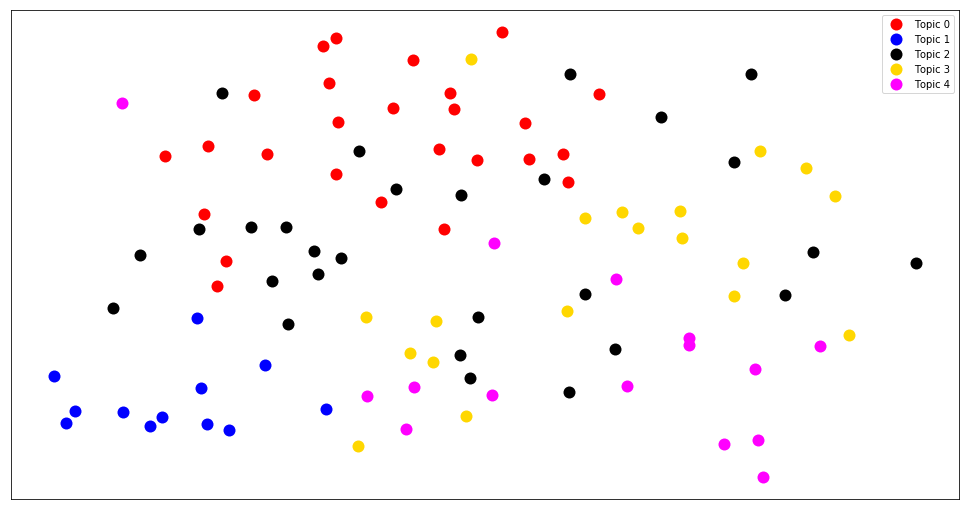

In [31]:
%matplotlib inline 

#create data frame that has the result of the MDS plus the cluster numbers and titles
df = pd.DataFrame(dict(x=xs, y=ys, label=clusters)) 

#group by cluster
groups = df.groupby('label')


# set up plot
fig, ax = plt.subplots(figsize=(17, 9)) # set size
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

#iterate through groups to layer the plot
#note that I use the cluster_name and cluster_color dicts with the 'name' lookup to return the appropriate color/label
for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=12, label=cluster_names[name], color=cluster_colors[name], mec='none')
    #
    ax.set_aspect('auto')
    ax.tick_params(\
        axis= 'x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom='False',      # ticks along the bottom edge are off
        top='False',         # ticks along the top edge are off
        labelbottom='False')
    ax.tick_params(\
        axis= 'y',         # changes apply to the y-axis
        which='both',      # both major and minor ticks are affected
        left='False',      # ticks along the bottom edge are off
        top='False',         # ticks along the top edge are off
        labelleft='False')
    
ax.legend(numpoints=1)  #show legend with only 1 point

#add label in x,y position with the label as the film title
# for i in range(len(df)):
#     ax.text(df.loc[i]['x'], df.loc[i]['y'], df.loc[i]['specie'], size=8)  

    
    
plt.show() #show the plot

#uncomment the below to save the plot if need be
#plt.savefig('clusters_mds.png', dpi=200)

In [ ]:
# from scipy.cluster.hierarchy import ward, dendrogram

# linkage_matrix = ward(dist) #define the linkage_matrix using ward clustering pre-computed distances

# fig, ax = plt.subplots(figsize=(15, 20)) # set size
# ax = dendrogram(linkage_matrix, orientation="right", labels=species);

# plt.tick_params(\
#     axis= 'x',          # changes apply to the x-axis
#     which='both',      # both major and minor ticks are affected
#     bottom='False',      # ticks along the bottom edge are off
#     top='False',         # ticks along the top edge are off
#     labelbottom='False')

# plt.tight_layout() #show plot with tight layout

# #uncomment below to save figure
# #plt.savefig('ward_clusters.png', dpi=200) #save figure as ward_clusters